# Tugas Praktikum: K-Means dan DBSCAN Clustering

## Tugas 1: K-Means Clustering pada Mall Customers Dataset
## Tugas 2: DBSCAN Clustering pada make_moons Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.metrics import (silhouette_score, homogeneity_score, completeness_score, 
                             v_measure_score, adjusted_rand_score, adjusted_mutual_info_score)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---
# TUGAS 1: K-Means Clustering
## Dataset: Mall_Customers.csv

In [2]:
# Load dan eksplorasi dataset Mall Customers
df = pd.read_csv('Mall_Customers.csv')

print("=" * 60)
print("EKSPLORASI DATA MALL CUSTOMERS")
print("=" * 60)
print(f"\nShape: {df.shape}")
print(f"\nKolom: {df.columns.tolist()}")
print(f"\nInfo Dataset:")
print(df.info())
print(f"\nStatistik Deskriptif:")
print(df.describe())
print(f"\n5 Data Pertama:")
df.head()

EKSPLORASI DATA MALL CUSTOMERS

Shape: (200, 5)

Kolom: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Statistik Deskriptif:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


FITUR YANG DIPILIH UNTUK CLUSTERING

1. Annual Income (k$) - Pendapatan tahunan
2. Spending Score (1-100) - Skor pengeluaran

Shape fitur: (200, 2)


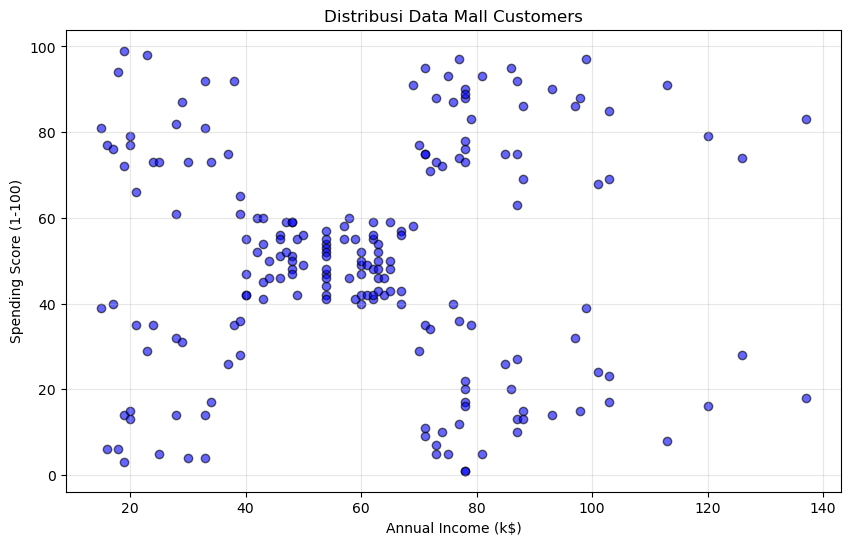

In [3]:
# ============================================================
# PEMILIHAN FITUR UNTUK CLUSTERING
# ============================================================
# Fitur yang tepat untuk clustering pelanggan mall:
# 1. Annual Income (k$) - Pendapatan tahunan pelanggan
# 2. Spending Score (1-100) - Skor pengeluaran pelanggan
#
# Alasan pemilihan:
# - CustomerID: Tidak relevan (hanya identifier)
# - Gender: Kategorikal, tidak cocok langsung untuk K-Means
# - Age: Bisa digunakan, tapi kombinasi Income-Spending lebih informatif
# - Annual Income & Spending Score: Menggambarkan perilaku belanja pelanggan

# Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print("=" * 60)
print("FITUR YANG DIPILIH UNTUK CLUSTERING")
print("=" * 60)
print("\n1. Annual Income (k$) - Pendapatan tahunan")
print("2. Spending Score (1-100) - Skor pengeluaran")
print(f"\nShape fitur: {X.shape}")

# Visualisasi data sebelum clustering
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribusi Data Mall Customers')
plt.grid(True, alpha=0.3)
plt.show()

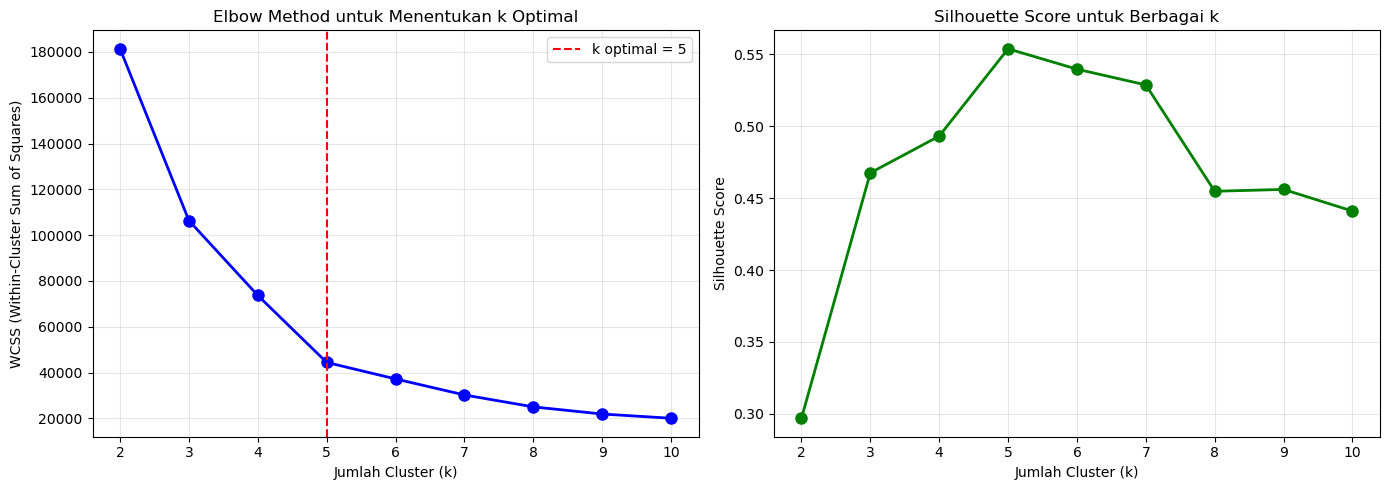

HASIL ANALISIS PEMILIHAN K
k=2: WCSS=181363.60, Silhouette Score=0.2969
k=3: WCSS=106348.37, Silhouette Score=0.4676
k=4: WCSS=73679.79, Silhouette Score=0.4932
k=5: WCSS=44448.46, Silhouette Score=0.5539
k=6: WCSS=37233.81, Silhouette Score=0.5398
k=7: WCSS=30241.34, Silhouette Score=0.5288
k=8: WCSS=25036.42, Silhouette Score=0.4548
k=9: WCSS=21916.79, Silhouette Score=0.4561
k=10: WCSS=20072.07, Silhouette Score=0.4411

Berdasarkan Silhouette Score tertinggi: k = 5
Berdasarkan Elbow Method: k = 5 (titik siku)

=> K optimal yang dipilih: 5


In [4]:
# ============================================================
# MENENTUKAN JUMLAH K TERBAIK DENGAN ELBOW METHOD
# ============================================================

# Hitung WCSS (Within-Cluster Sum of Squares) untuk berbagai nilai k
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualisasi Elbow Method dan Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Jumlah Cluster (k)')
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)')
axes[0].set_title('Elbow Method untuk Menentukan k Optimal')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=5, color='red', linestyle='--', label='k optimal = 5')
axes[0].legend()

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Jumlah Cluster (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score untuk Berbagai k')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tampilkan hasil
print("=" * 60)
print("HASIL ANALISIS PEMILIHAN K")
print("=" * 60)
for k, w, s in zip(K_range, wcss, silhouette_scores):
    print(f"k={k}: WCSS={w:.2f}, Silhouette Score={s:.4f}")

best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nBerdasarkan Silhouette Score tertinggi: k = {best_k}")
print("Berdasarkan Elbow Method: k = 5 (titik siku)")
print("\n=> K optimal yang dipilih: 5")

HASIL K-MEANS CLUSTERING (k=5)

Jumlah data per cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Centroid setiap cluster:
  Cluster 0: Income=55.30, Spending=49.52
  Cluster 1: Income=86.54, Spending=82.13
  Cluster 2: Income=25.73, Spending=79.36
  Cluster 3: Income=88.20, Spending=17.11
  Cluster 4: Income=26.30, Spending=20.91


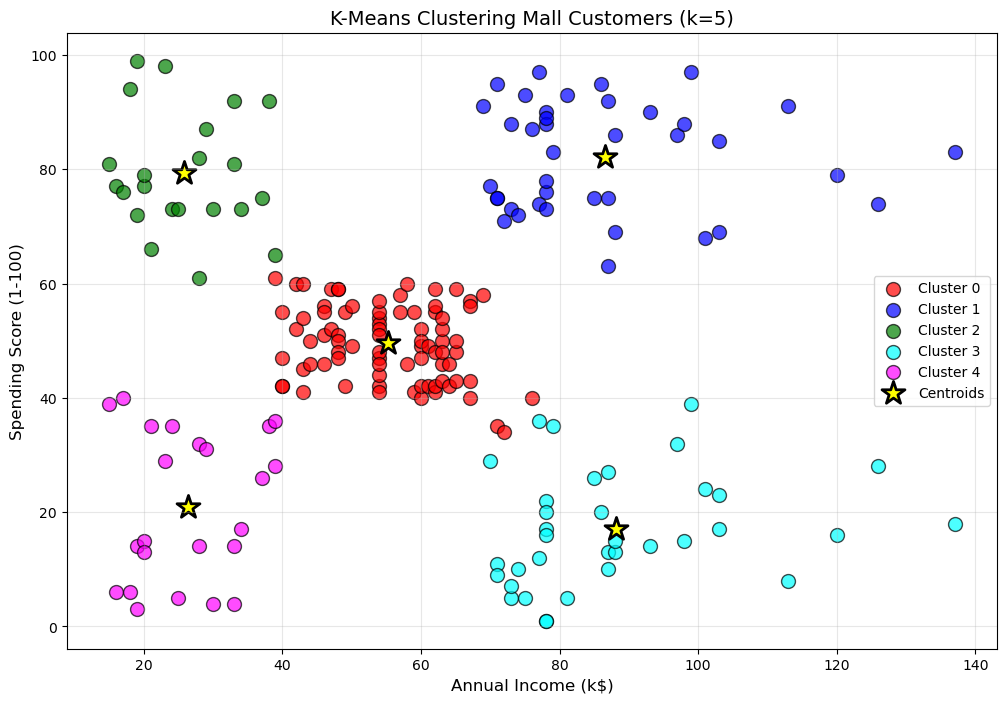

In [5]:
# ============================================================
# MODEL K-MEANS DENGAN K=5
# ============================================================

# Buat model K-Means dengan k=5
kmeans_optimal = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans_optimal.fit_predict(X)

# Tambahkan label cluster ke dataframe
df['Cluster'] = y_kmeans

print("=" * 60)
print("HASIL K-MEANS CLUSTERING (k=5)")
print("=" * 60)
print(f"\nJumlah data per cluster:")
print(df['Cluster'].value_counts().sort_index())
print(f"\nCentroid setiap cluster:")
centroids = kmeans_optimal.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"  Cluster {i}: Income={centroid[0]:.2f}, Spending={centroid[1]:.2f}")

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, c=colors[i], label=cluster_names[i], alpha=0.7, edgecolors='black')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', 
            marker='*', edgecolors='black', linewidths=2, label='Centroids')

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering Mall Customers (k=5)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# ============================================================
# INTERPRETASI CLUSTER PELANGGAN
# ============================================================

print("=" * 60)
print("INTERPRETASI SETIAP CLUSTER PELANGGAN")
print("=" * 60)

# Analisis karakteristik setiap cluster
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nRata-rata fitur per cluster:")
print(cluster_analysis)

print("\n" + "=" * 60)
print("SEGMENTASI PELANGGAN:")
print("=" * 60)

# Interpretasi berdasarkan centroid
interpretations = {
    'Low Income, Low Spending': 'Pelanggan hemat dengan pendapatan rendah',
    'High Income, High Spending': 'Pelanggan premium (target utama)',
    'Low Income, High Spending': 'Pelanggan impulsif',
    'High Income, Low Spending': 'Pelanggan konservatif',
    'Medium Income, Medium Spending': 'Pelanggan standar'
}

for i in range(5):
    income = centroids[i, 0]
    spending = centroids[i, 1]
    
    # Klasifikasi berdasarkan nilai
    if income < 40:
        income_cat = "Low Income"
    elif income > 70:
        income_cat = "High Income"
    else:
        income_cat = "Medium Income"
        
    if spending < 40:
        spending_cat = "Low Spending"
    elif spending > 60:
        spending_cat = "High Spending"
    else:
        spending_cat = "Medium Spending"
    
    print(f"\nCluster {i}:")
    print(f"  - Income: {income:.1f}k$ ({income_cat})")
    print(f"  - Spending: {spending:.1f} ({spending_cat})")
    print(f"  - Jumlah pelanggan: {(y_kmeans == i).sum()}")

INTERPRETASI SETIAP CLUSTER PELANGGAN

Rata-rata fitur per cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

SEGMENTASI PELANGGAN:

Cluster 0:
  - Income: 55.3k$ (Medium Income)
  - Spending: 49.5 (Medium Spending)
  - Jumlah pelanggan: 81

Cluster 1:
  - Income: 86.5k$ (High Income)
  - Spending: 82.1 (High Spending)
  - Jumlah pelanggan: 39

Cluster 2:
  - Income: 25.7k$ (Low Income)
  - Spending: 79.4 (High Spending)
  - Jumlah pelanggan: 22

Cluster 3:
  - Income: 88.2k$ (High Income)
  - Spending: 17.1 (Low Spending)
  - Jumlah pelanggan: 35

Cluster 4:
  - Income: 26.3k$ (Low Income)
  - Spending: 20.9 (Low Spending)
  - Jumlah pelanggan: 23


---
# TUGAS 2: DBSCAN Clustering
## Dataset: make_moons (1000 sampel, noise=0.05)

DATASET MAKE_MOONS
Jumlah sampel: 1000
Jumlah fitur: 2
Noise: 0.05

Label asli (ground truth): [0 1]
Distribusi label: 0=500, 1=500


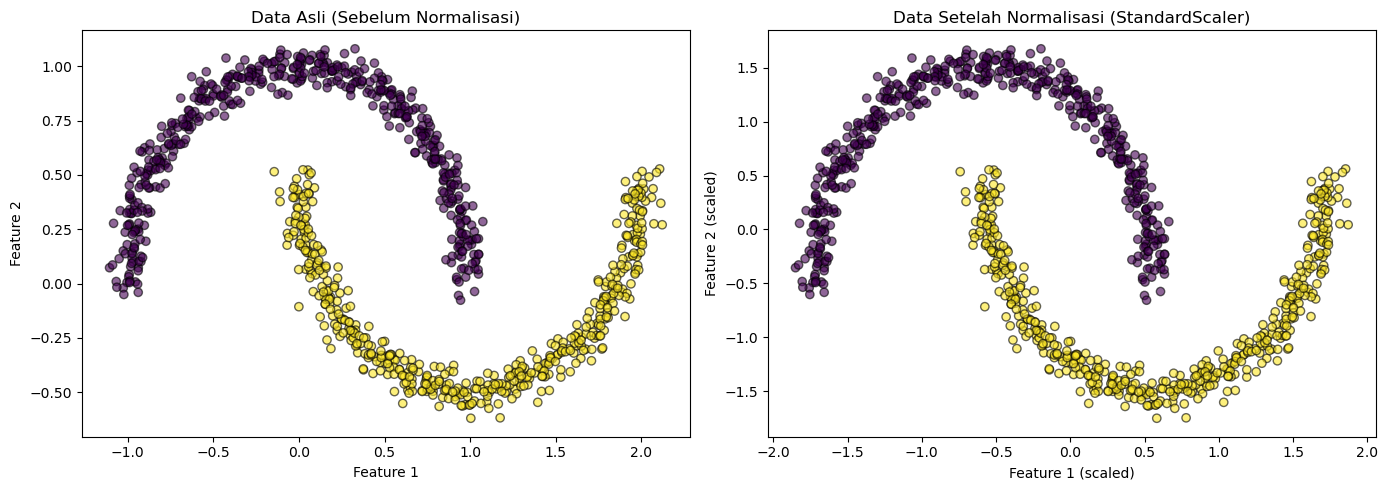

In [7]:
# ============================================================
# BUAT DATASET MAKE_MOONS DAN NORMALISASI
# ============================================================

# Buat dataset make_moons
X_moons, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

print("=" * 60)
print("DATASET MAKE_MOONS")
print("=" * 60)
print(f"Jumlah sampel: {X_moons.shape[0]}")
print(f"Jumlah fitur: {X_moons.shape[1]}")
print(f"Noise: 0.05")
print(f"\nLabel asli (ground truth): {np.unique(y_true)}")
print(f"Distribusi label: 0={np.sum(y_true==0)}, 1={np.sum(y_true==1)}")

# Visualisasi data sebelum clustering
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_true, cmap='viridis', alpha=0.6, edgecolors='black')
axes[0].set_title('Data Asli (Sebelum Normalisasi)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_true, cmap='viridis', alpha=0.6, edgecolors='black')
axes[1].set_title('Data Setelah Normalisasi (StandardScaler)')
axes[1].set_xlabel('Feature 1 (scaled)')
axes[1].set_ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()

In [8]:
# ============================================================
# DBSCAN DENGAN eps=0.2, min_samples=5
# ============================================================

# Jalankan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons_scaled)

# Hitung jumlah cluster dan noise
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)

print("=" * 60)
print("HASIL DBSCAN (eps=0.2, min_samples=5)")
print("=" * 60)
print(f"Jumlah cluster yang ditemukan: {n_clusters}")
print(f"Jumlah noise points: {n_noise}")
print(f"Persentase noise: {n_noise/len(y_dbscan)*100:.2f}%")
print(f"\nDistribusi label cluster:")
unique, counts = np.unique(y_dbscan, return_counts=True)
for label, count in zip(unique, counts):
    if label == -1:
        print(f"  Noise (-1): {count} points")
    else:
        print(f"  Cluster {label}: {count} points")

HASIL DBSCAN (eps=0.2, min_samples=5)
Jumlah cluster yang ditemukan: 2
Jumlah noise points: 0
Persentase noise: 0.00%

Distribusi label cluster:
  Cluster 0: 500 points
  Cluster 1: 500 points


In [9]:
# ============================================================
# EVALUASI DENGAN METRIK CLUSTERING
# ============================================================

# Filter data yang bukan noise untuk silhouette score
mask = y_dbscan != -1

print("=" * 60)
print("EVALUASI METRIK CLUSTERING")
print("=" * 60)

# Hitung metrik (butuh ground truth untuk beberapa metrik)
homogeneity = homogeneity_score(y_true, y_dbscan)
completeness = completeness_score(y_true, y_dbscan)
v_measure = v_measure_score(y_true, y_dbscan)
ari = adjusted_rand_score(y_true, y_dbscan)
ami = adjusted_mutual_info_score(y_true, y_dbscan)

# Silhouette score (hanya untuk data non-noise)
if mask.sum() > 1 and len(np.unique(y_dbscan[mask])) > 1:
    silhouette = silhouette_score(X_moons_scaled[mask], y_dbscan[mask])
else:
    silhouette = np.nan

print(f"\n1. Homogeneity Score: {homogeneity:.4f}")
print(f"   (Setiap cluster hanya berisi anggota dari satu kelas)")
print(f"\n2. Completeness Score: {completeness:.4f}")
print(f"   (Semua anggota kelas yang sama masuk ke cluster yang sama)")
print(f"\n3. V-measure Score: {v_measure:.4f}")
print(f"   (Harmonic mean dari Homogeneity dan Completeness)")
print(f"\n4. Adjusted Rand Index (ARI): {ari:.4f}")
print(f"   (Kesamaan antara clustering dan ground truth, adjusted for chance)")
print(f"\n5. Adjusted Mutual Information (AMI): {ami:.4f}")
print(f"   (Mutual information yang dinormalisasi)")
print(f"\n6. Silhouette Score: {silhouette:.4f}" if not np.isnan(silhouette) else "\n6. Silhouette Score: N/A (tidak cukup cluster)")
print(f"   (Mengukur seberapa mirip objek dengan clusternya sendiri)")

EVALUASI METRIK CLUSTERING

1. Homogeneity Score: 1.0000
   (Setiap cluster hanya berisi anggota dari satu kelas)

2. Completeness Score: 1.0000
   (Semua anggota kelas yang sama masuk ke cluster yang sama)

3. V-measure Score: 1.0000
   (Harmonic mean dari Homogeneity dan Completeness)

4. Adjusted Rand Index (ARI): 1.0000
   (Kesamaan antara clustering dan ground truth, adjusted for chance)

5. Adjusted Mutual Information (AMI): 1.0000
   (Mutual information yang dinormalisasi)

6. Silhouette Score: 0.3912
   (Mengukur seberapa mirip objek dengan clusternya sendiri)


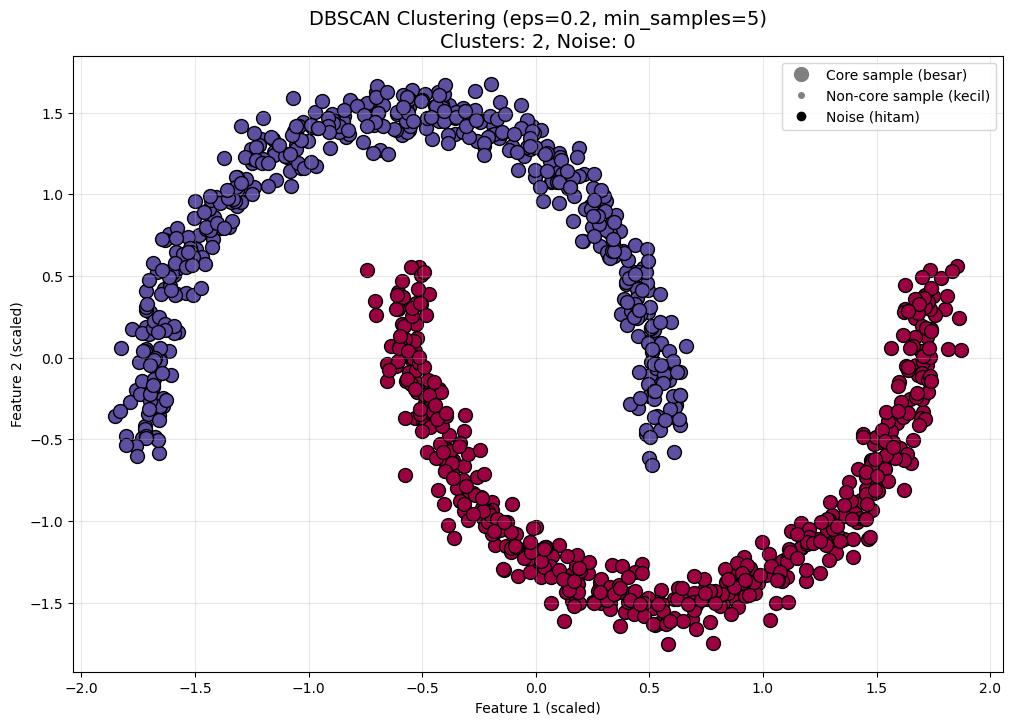


Keterangan visualisasi:
  - Titik BESAR: Core samples (memiliki >= min_samples tetangga dalam eps)
  - Titik KECIL: Non-core/Border samples (terhubung ke core tapi bukan core)
  - Titik HITAM: Noise points (tidak termasuk cluster manapun)


In [10]:
# ============================================================
# VISUALISASI HASIL DBSCAN
# Core sample = titik besar, Non-core = titik kecil, Noise = hitam
# ============================================================

# Identifikasi core samples
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Warna untuk setiap cluster
unique_labels = set(y_dbscan)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(12, 8))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points = hitam
        col = [0, 0, 0, 1]  # hitam
    
    class_member_mask = (y_dbscan == k)
    
    # Core samples = titik besar
    xy = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=100, c=[col], marker='o', 
                edgecolors='black', linewidths=1, 
                label=f'Cluster {k} (core)' if k != -1 else 'Noise')
    
    # Non-core samples = titik kecil
    xy = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], marker='o', 
                edgecolors='black', linewidths=0.5, alpha=0.6)

plt.title(f'DBSCAN Clustering (eps=0.2, min_samples=5)\n'
          f'Clusters: {n_clusters}, Noise: {n_noise}', fontsize=14)
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Tambahkan legend khusus
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
           markersize=12, label='Core sample (besar)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
           markersize=6, label='Non-core sample (kecil)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', 
           markersize=8, label='Noise (hitam)')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

print(f"\nKeterangan visualisasi:")
print(f"  - Titik BESAR: Core samples (memiliki >= min_samples tetangga dalam eps)")
print(f"  - Titik KECIL: Non-core/Border samples (terhubung ke core tapi bukan core)")
print(f"  - Titik HITAM: Noise points (tidak termasuk cluster manapun)")

## Eksperimen: Variasi Parameter eps dan min_samples

EKSPERIMEN 1: VARIASI NILAI EPS (min_samples=5 tetap)


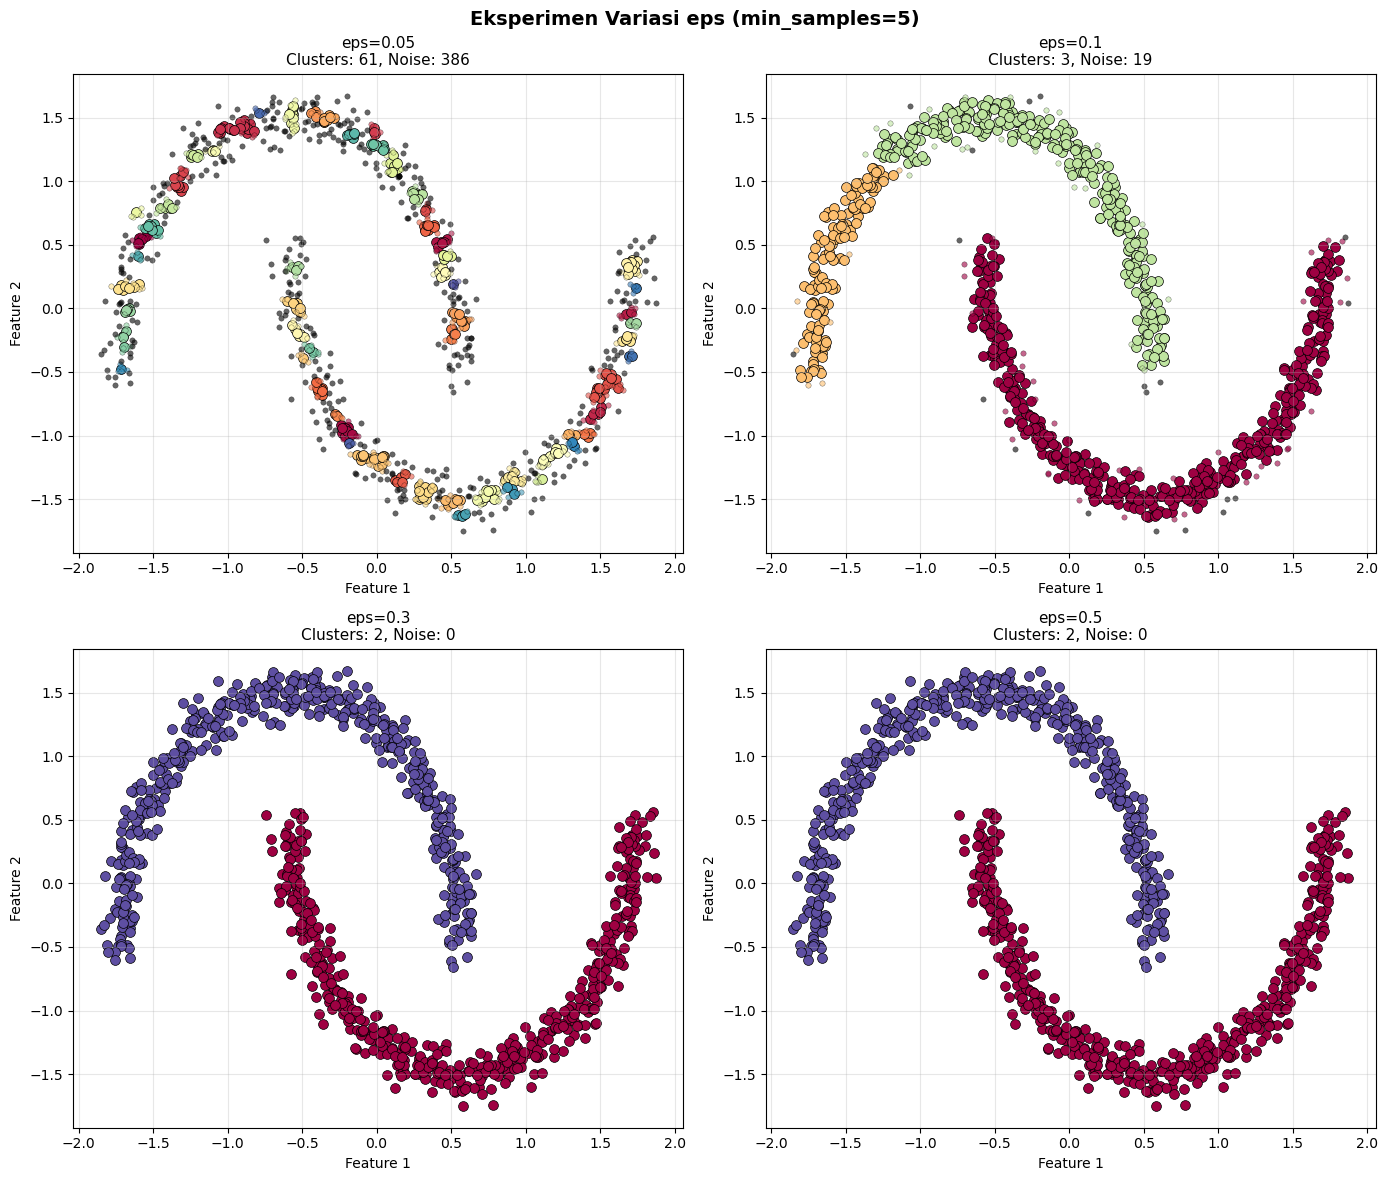


Hasil Eksperimen Variasi eps:
 eps  n_clusters  n_noise  homogeneity  completeness  v_measure      ARI      AMI  silhouette
0.05          61      386     0.615466      0.136931   0.224021 0.015642 0.210259    0.501707
0.10           3       19     0.981343      0.632772   0.769420 0.758440 0.769024    0.377767
0.30           2        0     1.000000      1.000000   1.000000 1.000000 1.000000    0.391160
0.50           2        0     1.000000      1.000000   1.000000 1.000000 1.000000    0.391160


In [11]:
# ============================================================
# EKSPERIMEN 1: VARIASI EPS (0.05, 0.1, 0.3, 0.5)
# ============================================================

eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_fixed = 5

print("=" * 80)
print("EKSPERIMEN 1: VARIASI NILAI EPS (min_samples=5 tetap)")
print("=" * 80)

results_eps = []

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, eps in enumerate(eps_values):
    # Jalankan DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples_fixed)
    labels = db.fit_predict(X_moons_scaled)
    
    # Hitung statistik
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Hitung metrik
    homo = homogeneity_score(y_true, labels)
    comp = completeness_score(y_true, labels)
    vmeas = v_measure_score(y_true, labels)
    ari = adjusted_rand_score(y_true, labels)
    ami = adjusted_mutual_info_score(y_true, labels)
    
    mask = labels != -1
    if mask.sum() > 1 and len(np.unique(labels[mask])) > 1:
        sil = silhouette_score(X_moons_scaled[mask], labels[mask])
    else:
        sil = np.nan
    
    results_eps.append({
        'eps': eps, 'n_clusters': n_clusters, 'n_noise': n_noise,
        'homogeneity': homo, 'completeness': comp, 'v_measure': vmeas,
        'ARI': ari, 'AMI': ami, 'silhouette': sil
    })
    
    # Visualisasi
    core_mask = np.zeros_like(labels, dtype=bool)
    core_mask[db.core_sample_indices_] = True
    
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_mask = (labels == k)
        xy = X_moons_scaled[class_mask & core_mask]
        axes[idx].scatter(xy[:, 0], xy[:, 1], s=50, c=[col], edgecolors='black', linewidths=0.5)
        xy = X_moons_scaled[class_mask & ~core_mask]
        axes[idx].scatter(xy[:, 0], xy[:, 1], s=15, c=[col], edgecolors='black', linewidths=0.3, alpha=0.6)
    
    axes[idx].set_title(f'eps={eps}\nClusters: {n_clusters}, Noise: {n_noise}', fontsize=11)
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Eksperimen Variasi eps (min_samples=5)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Tampilkan tabel hasil
df_eps = pd.DataFrame(results_eps)
print("\nHasil Eksperimen Variasi eps:")
print(df_eps.to_string(index=False))